In [1]:
import json
import pandas as pd

with open("../data/interim/comedy_preprocessed.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,url,comedian,special,transcript,text_clean,text_lower
0,https://scrapsfromtheloft.com/comedy/conan-obr...,None,None,Conan O’Brien: The Kennedy Center Mark Twain P...,Conan O’Brien: The Kennedy Center Mark Twain P...,conan o’brien: the kennedy center mark twain p...
1,https://scrapsfromtheloft.com/comedy/cristela-...,None,None,Cristela Alonzo: Middle Classy (2022) | Full t...,Cristela Alonzo: Middle Classy (2022) | Full t...,cristela alonzo: middle classy (2022) | full t...
2,https://scrapsfromtheloft.com/comedy/dave-chap...,None,None,Dave Chappelle: The Unstoppable (2025)Release ...,Dave Chappelle: The Unstoppable (2025)Release ...,dave chappelle: the unstoppable (2025)release ...
3,https://scrapsfromtheloft.com/comedy/dave-smit...,None,None,Part of the ProblemEpisode number:1306Premiere...,Part of the ProblemEpisode number:1306Premiere...,part of the problemepisode number:1306premiere...
4,https://scrapsfromtheloft.com/comedy/david-spa...,None,None,David Spade: Dandelion (2025) [cheers and appl...,David Spade: Dandelion (2025) <APPLAUSE> Nice....,david spade: dandelion (2025) <applause> nice....


## Corpus Level Statistics

In [2]:
# Transcript length
df["word_count"] = df["text_clean"].str.split().str.len()
df["word_count"].describe()

count       28.000000
mean      4132.535714
std       3450.626948
min        194.000000
25%       1252.750000
50%       2589.500000
75%       5809.500000
max      14308.000000
Name: word_count, dtype: float64

In [4]:
# Character length
df["char_count"] = df["text_clean"].str.len()
df["char_count"].describe()

count       28.000000
mean     22502.642857
std      18490.914871
min       1295.000000
25%       6791.000000
50%      14413.500000
75%      31697.250000
max      77201.000000
Name: char_count, dtype: float64

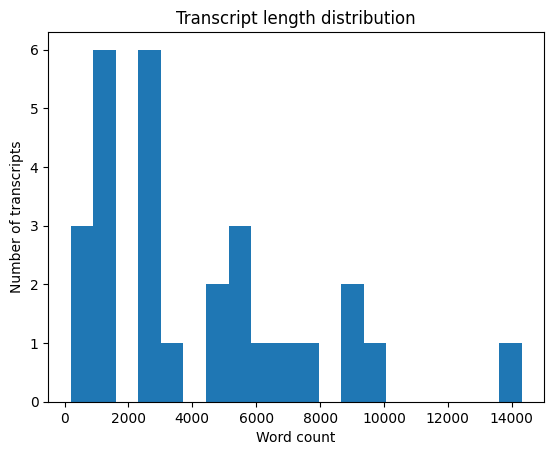

In [5]:
import matplotlib.pyplot as plt

plt.hist(df["word_count"], bins =20)
plt.xlabel("Word count")
plt.ylabel("Number of transcripts")
plt.title("Transcript length distribution")
plt.show()

- Wide spread signals multiple formats and not just comedy shows.
- comedy shows are around 3000 words max
- Rest signal ceremonies and other shows.

### Comedy Specific signal

In [6]:
# count of laughter tokens
df["laughter_count"] = df["text_clean"].str.count("<LAUGHTER>")
df["laughter_count"].describe()

count    28.000000
mean      1.142857
std       3.330157
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      16.000000
Name: laughter_count, dtype: float64

In [7]:
# Normalize: laughter per 1000 tokens
df["laughter_per_1k_words"] = (df["laughter_count"]/df["word_count"])*1000
df["laughter_per_1k_words"].describe()

count    28.000000
mean      0.598470
std       1.646649
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       6.937562
Name: laughter_per_1k_words, dtype: float64

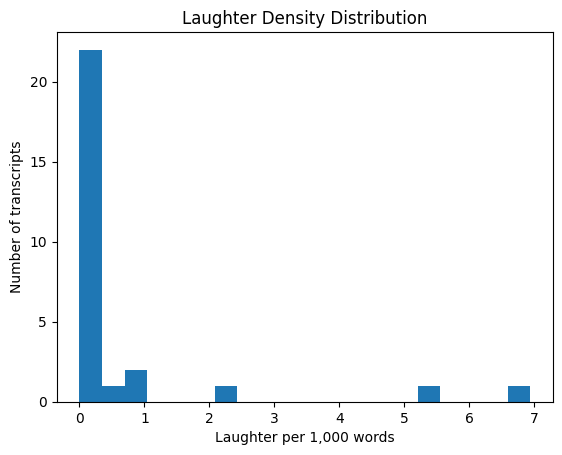

In [8]:
# Visualizing laughter density
plt.hist(df["laughter_per_1k_words"], bins = 20)
plt.xlabel("Laughter per 1,000 words")
plt.ylabel("Number of transcripts")
plt.title("Laughter Density Distribution")
plt.show()

- Confirms that high laughter exists in transcripts with less words (1000 ~ 3000)
- Signals that we may remove transcripts with high word count in order to filter the comedy sets.


### Vocabulary analysis

In [10]:
# vocabulary size per transcript
df["vocab_size"] = df["text_lower"].apply(
    lambda x: len(set(x.split()))
)

df["vocab_size"].describe()

count      28.000000
mean     1294.750000
std       850.688115
min       143.000000
25%       587.500000
50%      1048.000000
75%      1677.000000
max      4006.000000
Name: vocab_size, dtype: float64

In [12]:
# Lexical diversity
df["lexical_diversity"] = df["vocab_size"] / df["word_count"]
df["lexical_diversity"].describe()

count    28.000000
mean      0.394734
std       0.130622
min       0.243302
25%       0.283237
50%       0.361740
75%       0.486239
max       0.737113
Name: lexical_diversity, dtype: float64

### Most frequent words

In [3]:
from collections import Counter

all_words = " ".join(df["text_lower"]).split()
word_freq = Counter(all_words)

word_freq.most_common(20)

[('the', 3969),
 ('and', 3093),
 ('i', 3085),
 ('a', 2916),
 ('to', 2423),
 ('you', 2396),
 ('of', 1625),
 ('that', 1361),
 ('in', 1327),
 ('was', 1119),
 ('it', 1100),
 ('is', 1009),
 ('like,', 850),
 ('he', 823),
 ('this', 800),
 ('i’m', 786),
 ('but', 759),
 ('it’s', 737),
 ('for', 722),
 ('on', 720)]

In [4]:
# Frequent non-stopwords

import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

filtered_words = [
    w for w in all_words if w not in stop_words and len(w) > 2
]

Counter(filtered_words).most_common(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('like,', 850),
 ('i’m', 786),
 ('it’s', 737),
 ('don’t', 648),
 ('like', 598),
 ('know', 500),
 ('that’s', 448),
 ('get', 394),
 ('you’re', 357),
 ('got', 332),
 ('people', 326),
 ('think', 309),
 ('one', 267),
 ('would', 249),
 ('going', 247),
 ('there’s', 237),
 ('know,', 232),
 ('it.', 226),
 ('they’re', 201),
 ('even', 201)]